# INM702 - Coursework TASK 1

## 1.1 Import required libraries for task

In [1]:
import numpy as np
import pandas as pd
import keras
from matplotlib import pyplot as plt

In [2]:
# Use keras to import MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

## 1.2 Data inspection and preparation

Before procesing, we need to check the MNIST Data.
First we plot one sample image to see what our input data look like

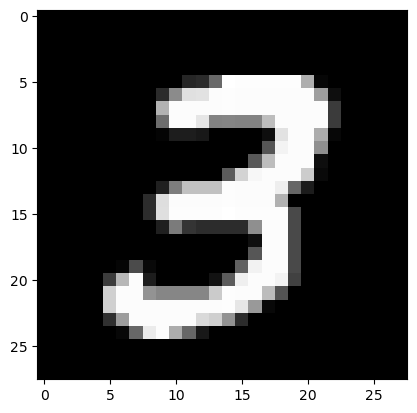

The number shown on image is: 3


In [3]:
# Plot a sample image
sample = 7
image = X_train[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()
print("The number shown on image is:", y_train[sample])

Then we print the size of the arrays we have created just to make sure they are as expected

In [4]:
print ("shape of X_train {}".format(X_train.shape))
print ("shape of X_test {}".format(X_test.shape))
print ("shape of y_train {}".format(y_train.shape))
print ("shape of y_test {}".format(y_test.shape))

shape of X_train (60000, 28, 28)
shape of X_test (10000, 28, 28)
shape of y_train (60000,)
shape of y_test (10000,)


Finally we print one data sample to see what it is like

In [5]:
X_train[7]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43,
        105, 255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,
          0,   0],
       [  

We can see that our input is a 28x28 array of integers with values in the range 0 to 255. These correspond to the input image size which is 28x28 pixels and the values represent the colour intensity of each pixel in the image in the greyscale range. 0 is black, 255 is white and the values in between are shades of grey. This can also be confirmed by the image that we have plotted above.   

In order to feed the data into our NN we need to "flatten" the 28x28 array into one dimension array containing all 784 elements and preserving the total number of input samples. We print the resulting size.

In [6]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

print ("new shape of X_train {}".format(X_train.shape))
print ("new shape of X_test {}".format(X_test.shape))
X_train[7]

new shape of X_train (60000, 784)
new shape of X_test (10000, 784)


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  38,  43, 105, 255, 253,
       253, 253, 253, 253, 174,   6,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  43, 139, 224, 22

Since all our features are integer values that range from 0 to 255 it is not absolutely necessary to standardize our input data. However we will perform a simple scaling of the data by dividing all values by the max value 255

In [7]:
X_train = X_train/255
X_test = X_test/255
X_train[7]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## 2.1 Neural Network Implementation

In [8]:
import numpy as np

class MyNeuralNetwork:
    def __init__(self,input_size,hidden_sizes,output_size,activation_function,dropout):
        self.layer_sizes = [input_size] + hidden_sizes + [output_size] # Number of neurons in each layer
        self.activation_function = activation_function                 # Activation function to use
        self.dropout = dropout                                         # Dropout probability
        self.weights = []                                              # Weights for each layer
        self.biases = []                                               # Biases for each layer
        self.input_size = input_size                                   # Input size
        self.output_size = output_size                                 # Output size              
        self.hidden_sizes = hidden_sizes                               # Hidden layer sizes

        for i in range(len(self.layer_sizes) - 1):
            self.weights.append(np.random.uniform(-0.5, 0.5, (self.layer_sizes[i+1], self.layer_sizes[i])))
            self.biases.append(np.zeros((self.layer_sizes[i+1], 1)))

            #Debug: Print shapes
            print(f"Weights in layer : {i}, Weights shape: {self.weights[i].shape}, Biases shape: {self.biases[i].shape}")
    
    #Staticmethod is used to call the function without creating an object
    #In this way we can call them in the activation function and deactivation function
    @staticmethod  
    def ReLU(Z):
        return np.maximum(0,Z)
    
    @staticmethod
    def derivative_ReLU(Z):
        return Z > 0
    
    @staticmethod
    def sigmoid(Z):
        # Cap the values of Z within the range [-700, 700], to prevent overflow
        Z = np.clip(Z, -700, 700)
        return 1 / (1 + np.exp(-Z))
    
    @staticmethod
    def derivative_sigmoid(Z):
        return MyNeuralNetwork.sigmoid(Z) * (1 - MyNeuralNetwork.sigmoid(Z))
    
    @staticmethod
    def softmax(Z):
        Z_exp = np.exp(Z - np.max(Z, axis=0))
        sum_Z_exp = np.sum(Z_exp, axis=0)
        softmax_output = Z_exp / sum_Z_exp
        return softmax_output
        
    def one_hot(self,Y):
        num_classes = self.output_size
        one_hot = np.zeros((Y.size,num_classes))
        one_hot[np.arange(Y.size), Y] = 1
        return one_hot.T
        
    def activation(self,Z):
        if self.activation_function == 'relu':
            return self.ReLU(Z)
        elif self.activation_function == 'sigmoid':
            return self.sigmoid(Z)
        elif self.activation_function == 'softmax':
            return self.softmax(Z)
        else:
            raise Exception('Activation function not supported')
        
    def derivative_activation(self,A):
        if self.activation_function == 'relu':
            return self.derivative_ReLU(A)
        elif self.activation_function == 'sigmoid':
            return self.derivative_sigmoid(A)
        else:
            raise Exception('Activation function not supported')
        
    def calculate_loss(self,A3,Y):
        # Calculate the loss using the cross-entropy loss function
        #Calcuation should be based on y_pred and y_true
        y_pred = A3
        y_true = self.one_hot(Y)

        #Clip the y_prediction between epsilon and 1 - epsilon to prevent log(0) error
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)

        #Calculate the loss as multi-class cross-entropy loss
        loss = - y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)
        loss = np.sum(loss) / Y.size

        return loss
        
    def forward_prop(self,X):
        # Forward propagation
        A = X.T
        layer_outputs = {}
        D = {} # Dropout mask matrices

        #Loop over each layer in the network
        for layer in range(len(self.layer_sizes)-1):
            # Compute the linear output Z for the current layer
            Z = self.weights[layer].dot(A) + self.biases[layer]

            #Check for the if not the last layer, and apply the activation function
            if (layer != len(self.layer_sizes) - 2 ):
                A = self.activation(Z)
                #Check for dropout and apply it accordingly 
                if self.dropout > 0: #apply dropout

                    '''

                    This line of code for dropout inspired from Andrew Ng's Deep Learning Specialization Course
                    https://www.youtube.com/watch?v=D8PJAL-MZv8
                    '''       

                    #Create a dropout mask matrix to be applied to a subset of neurons
                    D[layer] = np.random.rand(*A.shape) > self.dropout
                    #Apply the mask to A
                    A = A * D[layer]
                    #Normalize A to not to change expected value of A as keeping  probability
                    A = A / (1 - self.dropout)
                    
            #if there is no dropout
            else: #for the last layer use softmax activation function
                A = self.softmax(Z)
            layer_outputs[layer] = (A,Z)
            #Debuging: Print shapes
            #print(f"Forward Propagation, Layer: {layer}, A shape: {A.shape}, Z shape: {Z.shape}")
        
        return layer_outputs,D
    
    def backward_prop(self, X, Y, layer_outputs, D):

        m = X.shape[0]  # Number of training examples
        Y = self.one_hot(Y)  # One hot encode the labels
        gradients = {}  # Dictionary to store the gradients for each layer
        dZ = None 
        for layer in reversed(range(len(self.layer_sizes) - 1)): # Layers are backwardley calculate the gradients
            A, Z = layer_outputs[layer]                          # Get the layer's activations and linear outputs

            if layer == len(self.layer_sizes) - 2:  # Gradient for the last layer
                dZ = A - Y
                
            else:                                  # Gradient for the hidden layers
                dA = np.dot(self.weights[layer + 1].T, dZ)
                if self.dropout > 0:               # Apply dropout   
                    dA *= D[layer]
                dZ = dA * self.derivative_activation(Z)

            prev_A = layer_outputs[layer - 1][0] if layer != 0 else X.T     #If layer is not last one takes the previous layer's activation
                                                                            #If layers is last one takes the input X
            # Debugging: Print shapes
            #print(f" Backward_prop ,Layer: {layer}, prev_A shape: {prev_A.shape}, dZ.T shape: {dZ.T.shape}")

            #Calculate the gradients for each layer  and store them in gradients dictionary
            dW = np.dot(dZ, prev_A.T) / m
            db = np.sum(dZ, axis=1, keepdims=True) / m

            gradients[layer] = (dW, db)

        return gradients
          
    def update_gradient(self,gradients,learning_rate):
        # Update the weights and biases using gradient descent
        for layer in range(len(self.layer_sizes) - 1): 
            dW,db = gradients[layer]
            self.weights[layer] -= learning_rate * dW
            self.biases[layer] -= learning_rate * db
  
    def train(self,X,Y,learning_rate,epochs,batch_size,decay_rate,decay_step): 
        """
        Trains the neural network using the given training data.

        Parameters:
        self : MyNeuralNetwork
            The neural network object to train.
            

        X = numpy.ndarray
            The input data, where each row is a training example and each column is a feature.

        Y = numpy.ndarray
            The labels for each training example, where each row is a label. Must have the same number of rows as X.

        learning_rate : float
            The learning rate to use for weight updates in gradient descent.
        epochs : int
            The number of times to iterate over the entire training set.

        batch_size : int
            The number of training examples to split the training set into for mini-batch gradient descent.
        
        Returns:
        None
        """
        m = X.shape[0]
        losses = [] # Array to store the loss at each epoch
        accuracies = [] # Array to store the accuracy at each epoch
        learning_rate = learning_rate

        for epoch in range(epochs):
            epoch_loss = 0
            epoch_correct = 0

            #Applying the learning rate decay at specific steps
            if(epoch % decay_step == 0 and epochs != 0):
                learning_rate = learning_rate * (1.0/ (1.0 +decay_rate * epoch))

                #Print the new learning rate at each decay step
                print(f'The learning rate at epoch {epoch} is :{learning_rate}')

            #Shuffle the dataset at the start of each epoch
            permutation = np.random.permutation(m)
            X_shuffled = X[permutation]
            Y_shuffled = Y[permutation]

            #Divide the dataset into mini-batches  
            for i in range(0,m - (m % batch_size),batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                Y_batch = Y_shuffled[i:i+batch_size]

                # Forward propagation
                layer_outpus,D = self.forward_prop(X_batch )

                # Calculate the loss and store it
                last_layer = len(self.layer_sizes) - 2
                loss = self.calculate_loss(layer_outpus[last_layer][0], Y_batch)
                epoch_loss += loss

                # Calculate the number of correct predictions
                predictions = np.argmax(layer_outpus[last_layer][0], axis=0)
                actuals = (Y_batch)
                epoch_correct += np.sum(predictions == actuals)
               
                # Backward propagation
                gradients=self.backward_prop(X_batch, Y_batch, layer_outpus,D)

                # Updating gradients
                self.update_gradient(gradients,learning_rate)

            #Calculate the average loss for this epoch and store it 
            average_epoch_loss = epoch_loss / (m // batch_size)
            average_epoch_accuracy = epoch_correct / (m)
            accuracies.append(average_epoch_accuracy)
            losses.append(average_epoch_loss)

            #Print the loss at each epoch with decimal point 5
            print(f'In  epoch  {epoch} loss  is : {average_epoch_loss:.5f} and accuracy is: {average_epoch_accuracy:.5f}')
            
        return losses,accuracies
            
    def predict(self,X):
        layer_outputs,_ = self.forward_prop(X)
        last_layer_acitvation = layer_outputs[len(self.layer_sizes) - 2][0]
        predictions = np.argmax(last_layer_acitvation, axis=0)
        return (last_layer_acitvation,predictions)

    def accuracy_score(self,X,Y):
        #The last layer of A3 is the probabilistic values of each class to calculate loss 
        last_layer_activation,predictions = self.predict(X)

        size = Y.size
                
        correct = np.sum(predictions == Y)
        accuracy = correct / size
        return last_layer_activation,accuracy

    def test(self,X,Y):
        last_layer_acitvation,accuracy = self.accuracy_score(X,Y)
        test_loss = self.calculate_loss(last_layer_acitvation, Y)
        
        return test_loss,accuracy                 

## 2.2 Network Evaluation for different Architectures

### 2.2.1 Simple Neural Network architecture (Perceptron) with Sigmoid 16 nodes

1 hidden layer, 16 nodes, Sigmoid, no dropout, epochs=30, mini-batch size=64, learning rate= 1, decay rate=0.1

In [9]:
# Create a dictionary that contains all the loss and accuracy values for each model
test_results = {}

# Create a neural network object
nn1 = MyNeuralNetwork(input_size=784, hidden_sizes=[16], output_size=10, activation_function='sigmoid',dropout=0.0)

Weights in layer : 0, Weights shape: (16, 784), Biases shape: (16, 1)
Weights in layer : 1, Weights shape: (10, 16), Biases shape: (10, 1)


In [10]:
# Train the neural network
losses,accuracies = nn1.train(X_train, y_train, learning_rate=1, epochs=30, batch_size=64,decay_rate=0.1,decay_step=10)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
test_results['nn1_train_loss'] = last_epoch_loss

The learning rate at epoch 0 is :1.0
In  epoch  0 loss  is : 0.74105 and accuracy is: 0.86967
In  epoch  1 loss  is : 0.43945 and accuracy is: 0.92503
In  epoch  2 loss  is : 0.37421 and accuracy is: 0.93558
In  epoch  3 loss  is : 0.34034 and accuracy is: 0.94110
In  epoch  4 loss  is : 0.31991 and accuracy is: 0.94528
In  epoch  5 loss  is : 0.30478 and accuracy is: 0.94778
In  epoch  6 loss  is : 0.28952 and accuracy is: 0.94993
In  epoch  7 loss  is : 0.28184 and accuracy is: 0.95160
In  epoch  8 loss  is : 0.27413 and accuracy is: 0.95302
In  epoch  9 loss  is : 0.26457 and accuracy is: 0.95512
The learning rate at epoch 10 is :0.5
In  epoch  10 loss  is : 0.23772 and accuracy is: 0.95973
In  epoch  11 loss  is : 0.23096 and accuracy is: 0.96072
In  epoch  12 loss  is : 0.22880 and accuracy is: 0.96118
In  epoch  13 loss  is : 0.22483 and accuracy is: 0.96182
In  epoch  14 loss  is : 0.22199 and accuracy is: 0.96230
In  epoch  15 loss  is : 0.21868 and accuracy is: 0.96290
In  epo

In [11]:
# Test the neural network
loss,acc = nn1.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
test_results['nn1_test_loss'] = loss
#test_results['nn1'] = {'loss':losses,'accuracy':accuracies}

Test Loss: 0.29243184164062835, Test Accuracy: 0.9518


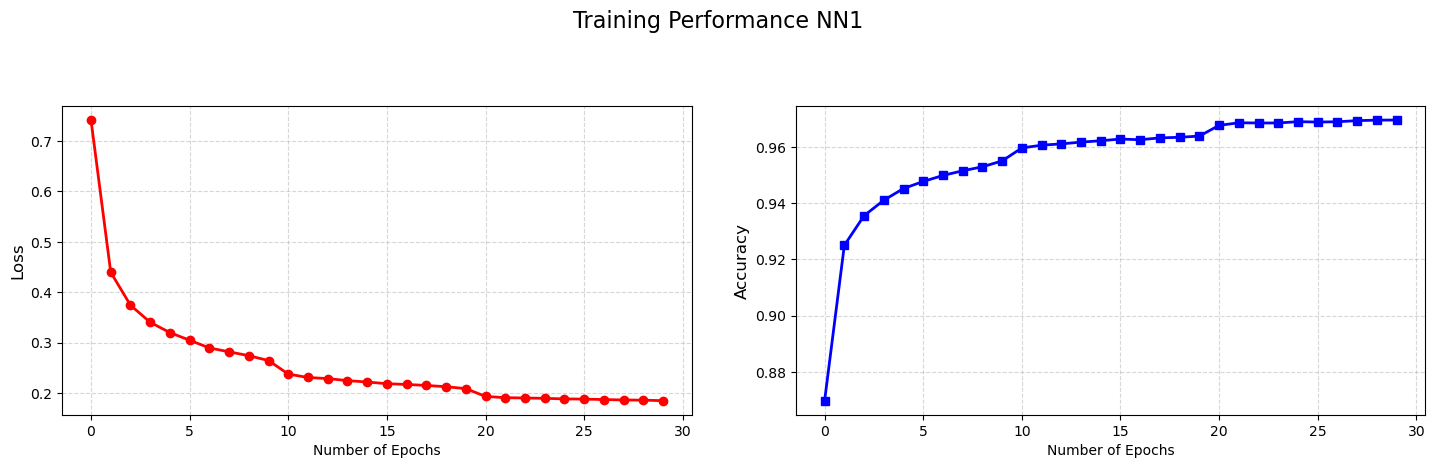

In [12]:
#Plot the loss and accuracy curves for the training process 
#Show it next to each other in the same figure

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Training Performance NN1', fontsize=16)
ax1.plot(losses, color='red', marker='o', linestyle='-', linewidth=2, markersize=6)
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Loss', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)
ax2.plot(accuracies, color='blue', marker='s', linestyle='-', linewidth=2, markersize=6)
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.5)
# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()

### 2.2.2 Simple Neural Network architecture (Perceptron) with Sigmoid 128 nodes

1 hidden layer, 128 nodes, Sigmoid, no dropout, epochs=30, mini-batch size=64, learning rate= 1, decay rate=0.1

In [13]:
# Create a neural network object
nn2 = MyNeuralNetwork(input_size=784, hidden_sizes=[128], output_size=10, activation_function='sigmoid',dropout=0.0)

Weights in layer : 0, Weights shape: (128, 784), Biases shape: (128, 1)
Weights in layer : 1, Weights shape: (10, 128), Biases shape: (10, 1)


In [14]:
# Train the neural network
losses,accuracies = nn2.train(X_train, y_train, learning_rate=1, epochs=30, batch_size=64,decay_rate=0.1,decay_step=10)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
test_results['nn2_train_loss'] = last_epoch_loss

The learning rate at epoch 0 is :1.0
In  epoch  0 loss  is : 0.55897 and accuracy is: 0.90327
In  epoch  1 loss  is : 0.27902 and accuracy is: 0.95175
In  epoch  2 loss  is : 0.20849 and accuracy is: 0.96470
In  epoch  3 loss  is : 0.16615 and accuracy is: 0.97205
In  epoch  4 loss  is : 0.13819 and accuracy is: 0.97720
In  epoch  5 loss  is : 0.11572 and accuracy is: 0.98080
In  epoch  6 loss  is : 0.09948 and accuracy is: 0.98395
In  epoch  7 loss  is : 0.08527 and accuracy is: 0.98647
In  epoch  8 loss  is : 0.07435 and accuracy is: 0.98865
In  epoch  9 loss  is : 0.06469 and accuracy is: 0.99085
The learning rate at epoch 10 is :0.5
In  epoch  10 loss  is : 0.05106 and accuracy is: 0.99348
In  epoch  11 loss  is : 0.04715 and accuracy is: 0.99398
In  epoch  12 loss  is : 0.04406 and accuracy is: 0.99487
In  epoch  13 loss  is : 0.04145 and accuracy is: 0.99520
In  epoch  14 loss  is : 0.03866 and accuracy is: 0.99567
In  epoch  15 loss  is : 0.03640 and accuracy is: 0.99627
In  epo

In [15]:
# Test the neural network
loss,acc = nn2.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
test_results['nn2_test_loss'] = loss
#test_results['nn2'] = {'loss':losses,'accuracy':accuracies}

Test Loss: 0.12548781244534246, Test Accuracy: 0.979


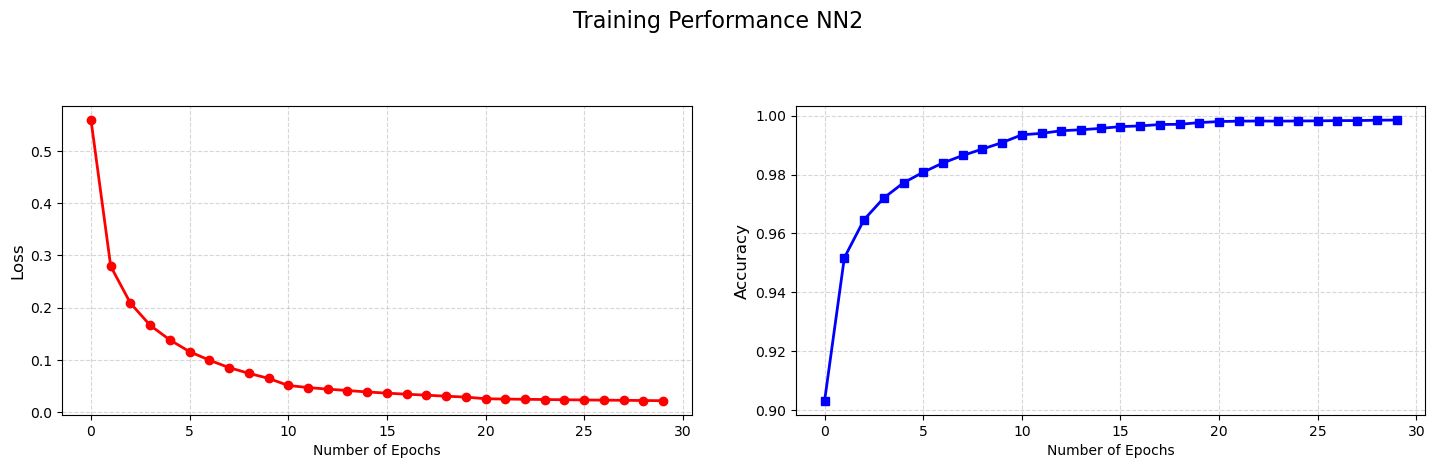

In [16]:
#Plot the loss and accuracy curves for the training process 
#Show it next to each other in the same figure

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Training Performance NN2', fontsize=16)
ax1.plot(losses, color='red', marker='o', linestyle='-', linewidth=2, markersize=6)
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Loss', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)
ax2.plot(accuracies, color='blue', marker='s', linestyle='-', linewidth=2, markersize=6)
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.5)
# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()

### 2.2.3 Slightly more complex architecture 2 hidden layers Sigmoid with 32, 16 nodes respectively

2 hidden layers, 32 x 16 nodes, Sigmoid, no dropout, epochs=30, mini-batch size=64, learning rate= 1, decay rate=0.1

In [17]:
nn3 = MyNeuralNetwork(input_size=784, hidden_sizes=[32,16], output_size=10, activation_function='sigmoid',dropout=0.0)

Weights in layer : 0, Weights shape: (32, 784), Biases shape: (32, 1)
Weights in layer : 1, Weights shape: (16, 32), Biases shape: (16, 1)
Weights in layer : 2, Weights shape: (10, 16), Biases shape: (10, 1)


In [18]:
# Train the neural network
# Batch sizes, decay rate and learning rate changed !! 
losses,accuracies = nn3.train(X_train, y_train, learning_rate=1, epochs=30, batch_size=64,decay_rate=0.1,decay_step=10)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
test_results['nn3_train_loss'] = last_epoch_loss

The learning rate at epoch 0 is :1.0
In  epoch  0 loss  is : 0.84502 and accuracy is: 0.84507
In  epoch  1 loss  is : 0.38023 and accuracy is: 0.93368
In  epoch  2 loss  is : 0.30202 and accuracy is: 0.94722
In  epoch  3 loss  is : 0.26265 and accuracy is: 0.95333
In  epoch  4 loss  is : 0.23337 and accuracy is: 0.95957
In  epoch  5 loss  is : 0.21374 and accuracy is: 0.96263
In  epoch  6 loss  is : 0.19500 and accuracy is: 0.96672
In  epoch  7 loss  is : 0.18072 and accuracy is: 0.96893
In  epoch  8 loss  is : 0.17075 and accuracy is: 0.97008
In  epoch  9 loss  is : 0.16136 and accuracy is: 0.97205
The learning rate at epoch 10 is :0.5
In  epoch  10 loss  is : 0.12889 and accuracy is: 0.97810
In  epoch  11 loss  is : 0.12158 and accuracy is: 0.97970
In  epoch  12 loss  is : 0.11748 and accuracy is: 0.98030
In  epoch  13 loss  is : 0.11382 and accuracy is: 0.98122
In  epoch  14 loss  is : 0.10957 and accuracy is: 0.98208
In  epoch  15 loss  is : 0.10551 and accuracy is: 0.98250
In  epo

In [19]:
# Test the neural network
loss,acc = nn3.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
#test_results['nn3'] = {'loss':losses,'accuracy':accuracies}
# Append test loss to dictionary for plotting
test_results['nn3_test_loss'] = loss


Test Loss: 0.2107158366988126, Test Accuracy: 0.9668


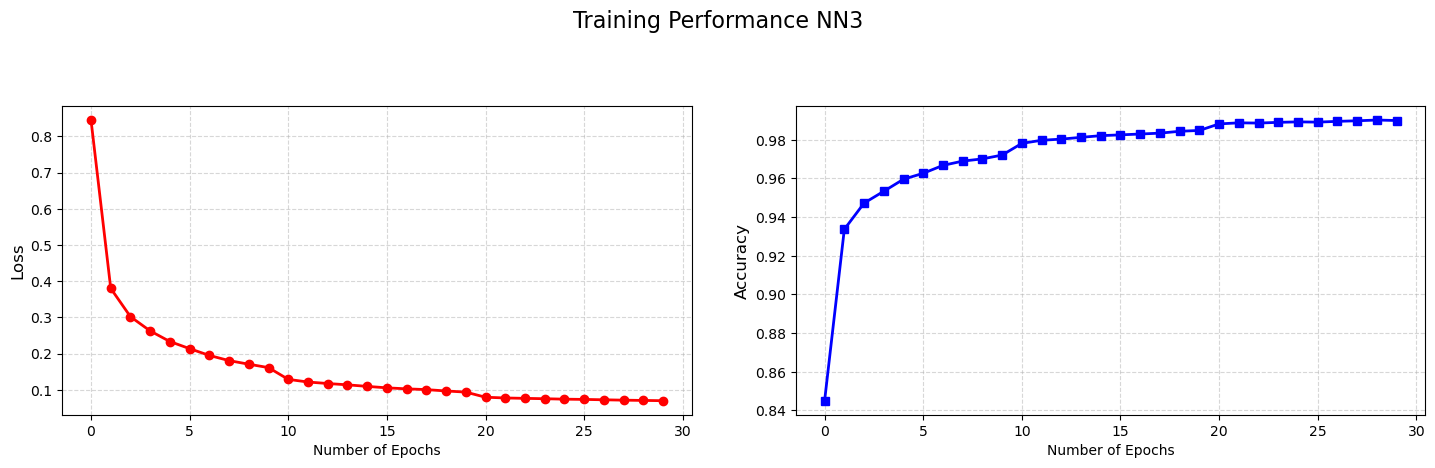

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Training Performance NN3', fontsize=16)
ax1.plot(losses, color='red', marker='o', linestyle='-', linewidth=2, markersize=6)
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Loss', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)
ax2.plot(accuracies, color='blue', marker='s', linestyle='-', linewidth=2, markersize=6)
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.5)
# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()

### 2.2.4 Slightly more complex architecture 2 hidden layers Sigmoid with 128, 16 nodes respectively

2 hidden layers, 128 x 16 nodes, Sigmoid, no dropout, epochs=30, mini-batch size=64, learning rate= 1, decay rate=0.1

In [21]:
nn4 = MyNeuralNetwork(input_size=784, hidden_sizes=[128,16], output_size=10, activation_function='sigmoid',dropout=0.0)

Weights in layer : 0, Weights shape: (128, 784), Biases shape: (128, 1)
Weights in layer : 1, Weights shape: (16, 128), Biases shape: (16, 1)
Weights in layer : 2, Weights shape: (10, 16), Biases shape: (10, 1)


In [22]:
# Train the neural network
# Batch sizes, decay rate and learning rate changed !! 
losses,accuracies = nn4.train(X_train, y_train, learning_rate=1, epochs=30, batch_size=64,decay_rate=0.1,decay_step=10)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
test_results['nn4_train_loss'] = last_epoch_loss

The learning rate at epoch 0 is :1.0
In  epoch  0 loss  is : 0.71418 and accuracy is: 0.87345
In  epoch  1 loss  is : 0.32394 and accuracy is: 0.94320
In  epoch  2 loss  is : 0.23431 and accuracy is: 0.95923
In  epoch  3 loss  is : 0.18535 and accuracy is: 0.96760
In  epoch  4 loss  is : 0.15536 and accuracy is: 0.97272
In  epoch  5 loss  is : 0.12881 and accuracy is: 0.97812
In  epoch  6 loss  is : 0.10724 and accuracy is: 0.98153
In  epoch  7 loss  is : 0.09187 and accuracy is: 0.98435
In  epoch  8 loss  is : 0.08085 and accuracy is: 0.98638
In  epoch  9 loss  is : 0.06585 and accuracy is: 0.98938
The learning rate at epoch 10 is :0.5
In  epoch  10 loss  is : 0.04409 and accuracy is: 0.99385
In  epoch  11 loss  is : 0.03847 and accuracy is: 0.99497
In  epoch  12 loss  is : 0.03461 and accuracy is: 0.99585
In  epoch  13 loss  is : 0.03202 and accuracy is: 0.99617
In  epoch  14 loss  is : 0.02900 and accuracy is: 0.99657
In  epoch  15 loss  is : 0.02607 and accuracy is: 0.99713
In  epo

In [23]:
# Test the neural network
loss,acc = nn4.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
#test_results['nn4'] = {'loss':losses,'accuracy':accuracies}
# Append test loss to dictionary for plotting
test_results['nn4_test_loss'] = loss

Test Loss: 0.14471181714835862, Test Accuracy: 0.9769


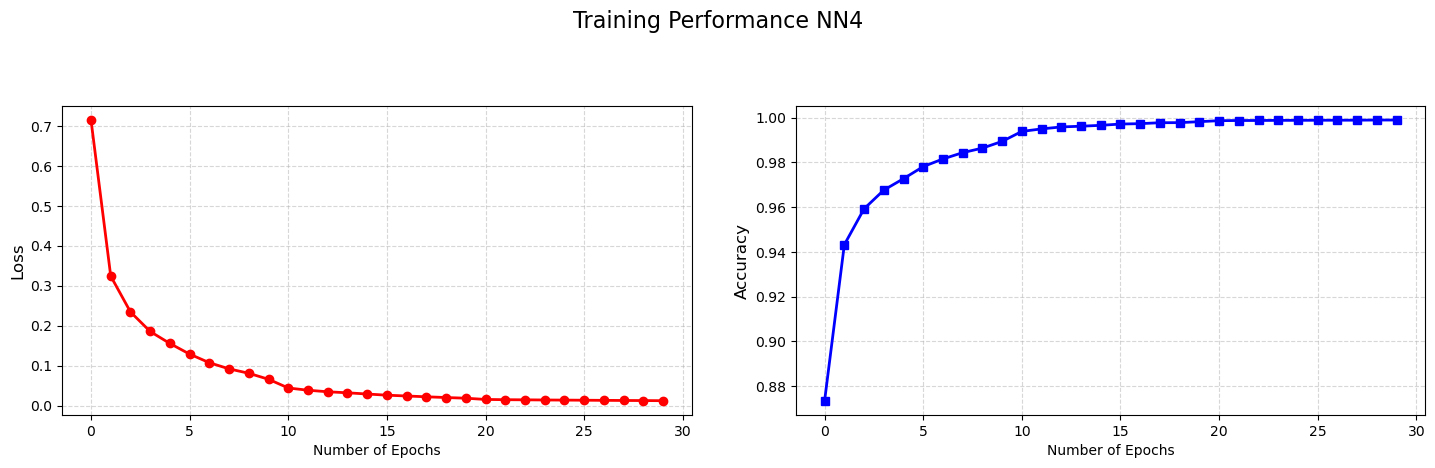

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Training Performance NN4', fontsize=16)
ax1.plot(losses, color='red', marker='o', linestyle='-', linewidth=2, markersize=6)
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Loss', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)
ax2.plot(accuracies, color='blue', marker='s', linestyle='-', linewidth=2, markersize=6)
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.5)
# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()

### 2.2.5 Slightly more complex architecture 3 hidden layers Sigmoid with 128, 64, 32 nodes respectively

2 hidden layers, 128 x 64 x 32 nodes, Sigmoid, no dropout, epochs=30, mini-batch size=64, learning rate= 1, decay rate=0.1

In [25]:
nn5 = MyNeuralNetwork(input_size=784, hidden_sizes=[128,64,32], output_size=10, activation_function='sigmoid',dropout=0.0)

Weights in layer : 0, Weights shape: (128, 784), Biases shape: (128, 1)
Weights in layer : 1, Weights shape: (64, 128), Biases shape: (64, 1)
Weights in layer : 2, Weights shape: (32, 64), Biases shape: (32, 1)
Weights in layer : 3, Weights shape: (10, 32), Biases shape: (10, 1)


In [26]:
# Train the neural network
# Batch sizes, decay rate and learning rate changed !! 
losses,accuracies = nn5.train(X_train, y_train, learning_rate=1, epochs=30, batch_size=64,decay_rate=0.1,decay_step=10)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
test_results['nn5_train_loss'] = last_epoch_loss

The learning rate at epoch 0 is :1.0
In  epoch  0 loss  is : 0.76517 and accuracy is: 0.85223
In  epoch  1 loss  is : 0.32342 and accuracy is: 0.94145
In  epoch  2 loss  is : 0.23374 and accuracy is: 0.95848
In  epoch  3 loss  is : 0.18539 and accuracy is: 0.96697
In  epoch  4 loss  is : 0.15178 and accuracy is: 0.97350
In  epoch  5 loss  is : 0.12521 and accuracy is: 0.97812
In  epoch  6 loss  is : 0.10340 and accuracy is: 0.98223
In  epoch  7 loss  is : 0.09021 and accuracy is: 0.98453
In  epoch  8 loss  is : 0.07510 and accuracy is: 0.98717
In  epoch  9 loss  is : 0.06530 and accuracy is: 0.98917
The learning rate at epoch 10 is :0.5
In  epoch  10 loss  is : 0.03870 and accuracy is: 0.99437
In  epoch  11 loss  is : 0.03285 and accuracy is: 0.99567
In  epoch  12 loss  is : 0.02882 and accuracy is: 0.99615
In  epoch  13 loss  is : 0.02582 and accuracy is: 0.99660
In  epoch  14 loss  is : 0.02267 and accuracy is: 0.99723
In  epoch  15 loss  is : 0.02068 and accuracy is: 0.99750
In  epo

In [27]:
# Test the neural network
loss,acc = nn5.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
#test_results['nn5'] = {'loss':losses,'accuracy':accuracies}
# Append test loss to dictionary for plotting
test_results['nn5_test_loss'] = loss

Test Loss: 0.15572790565181666, Test Accuracy: 0.9771


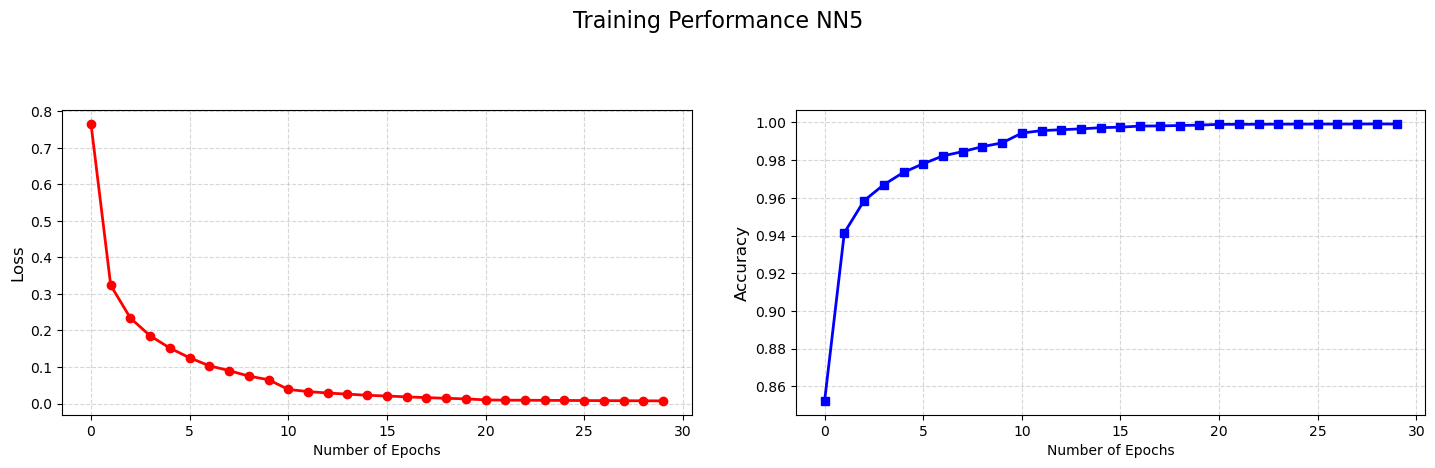

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Training Performance NN5', fontsize=16)
ax1.plot(losses, color='red', marker='o', linestyle='-', linewidth=2, markersize=6)
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Loss', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)
ax2.plot(accuracies, color='blue', marker='s', linestyle='-', linewidth=2, markersize=6)
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.5)
# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()

### 2.2.6 Complex Architecture with ReLU, dropout and SGD optimizer

In [13]:
nn6 = MyNeuralNetwork(input_size=784, hidden_sizes=[128,64,32], output_size=10, activation_function='relu',dropout=0.3)

Weights in layer : 0, Weights shape: (128, 784), Biases shape: (128, 1)
Weights in layer : 1, Weights shape: (64, 128), Biases shape: (64, 1)
Weights in layer : 2, Weights shape: (32, 64), Biases shape: (32, 1)
Weights in layer : 3, Weights shape: (10, 32), Biases shape: (10, 1)


In [26]:
# Train the neural network
# Batch sizes, decay rate and learning rate changed !! 
losses,accuracies = nn6.train(X_train, y_train, learning_rate=0.01, epochs=10, batch_size=1,decay_rate=0.01,decay_step=10)

The learning rate at epoch 0 is :0.01


In  epoch  0 loss  is : 2.13125 and accuracy is: 0.51535
In  epoch  1 loss  is : 1.05961 and accuracy is: 0.80787
In  epoch  2 loss  is : 0.79396 and accuracy is: 0.86497
In  epoch  3 loss  is : 0.67632 and accuracy is: 0.88928
In  epoch  4 loss  is : 0.59991 and accuracy is: 0.90317
In  epoch  5 loss  is : 0.54925 and accuracy is: 0.91247
In  epoch  6 loss  is : 0.49790 and accuracy is: 0.92085
In  epoch  7 loss  is : 0.46301 and accuracy is: 0.92550
In  epoch  8 loss  is : 0.45346 and accuracy is: 0.92828
In  epoch  9 loss  is : 0.42730 and accuracy is: 0.93302


In [27]:
# Test the neural network
loss,acc = nn6.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
test_results['nn5'] = {'loss':losses,'accuracy':accuracies}

Test Loss: 0.4533912470717704, Test Accuracy: 0.9292


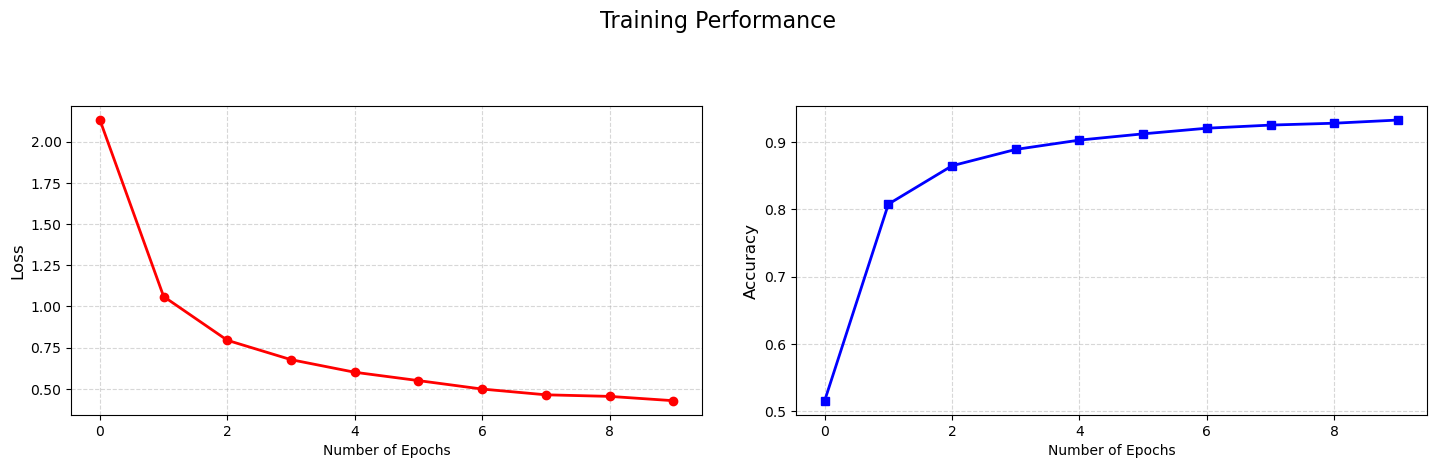

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Training Performance', fontsize=16)
ax1.plot(losses, color='red', marker='o', linestyle='-', linewidth=2, markersize=6)
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Loss', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)
ax2.plot(accuracies, color='blue', marker='s', linestyle='-', linewidth=2, markersize=6)
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.5)
# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()

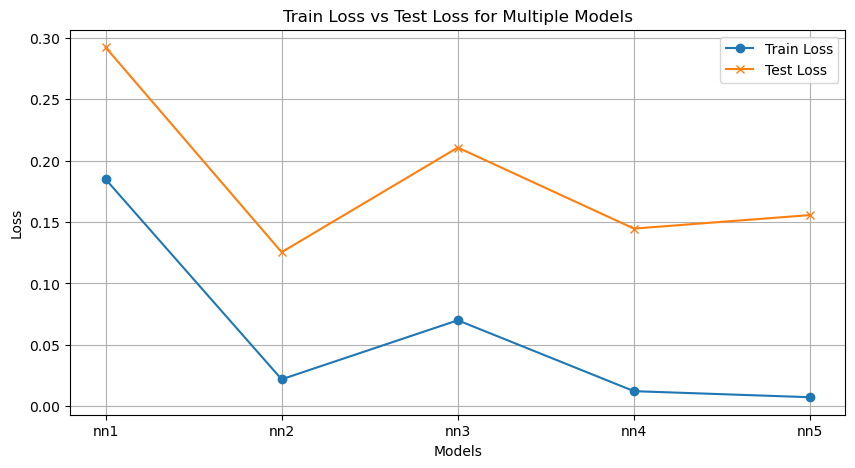

In [31]:
# print(test_results)
# Extracting train and test losses
train_losses = []
test_losses = []
models = []

for key, value in test_results.items():
    if 'train_loss' in key:
        train_losses.append(value)
        models.append(key.split('_')[0])
    elif 'test_loss' in key:
        test_losses.append(value)

# Plot values:
plt.figure(figsize=(10, 5))
plt.plot(models, train_losses, label='Train Loss', marker='o')
plt.plot(models, test_losses, label='Test Loss', marker='x')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.title('Train Loss vs Test Loss for Multiple Models')
plt.legend()
plt.grid(True)
plt.show()